In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9473747733811872866
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4930941747
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9411218625025268719
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [3]:
train_df = pd.read_csv("train_df.csv")
test_df = pd.read_csv("test_df.csv")

In [4]:
print(train_df.head())
print(test_df.head())

      artist             album  \
0      starr         RingoRama   
1  mccartney  MemoryAlmostFull   
2      starr              YNot   
3      starr  BeaucoupsOfBlues   
4      starr     SmellTheRoses   

                                              song  
0             Memphis In Your Mind-0XwFvuUkN00.png  
1                Ever Present Past-raw_sIqjO3Y.png  
2              Ringo Starr - Y Not-s5H9yDn6jV4.png  
3                          Waiting-knEhJRs3QBY.png  
4  Ringo Starr Back - Off Boogaloo-fYOVk3P71yM.png  
    artist           album                                               song
0  Beatles  BeatlesForSale  Rock And Roll Music (Remastered 2009)-IRF6nmqc...
1  Beatles       SgtPepper  Good Morning Good Morning (Remastered 2009)-sj...
2  Beatles       AbbeyRoad  You Never Give Me Your Money (2019 Mix)-W8uZje...
3  Beatles       SgtPepper  Being For The Benefit Of Mr. Kite! (Remastered...
4  Beatles  BeatlesForSale     Mr Moonlight (Remastered 2009)-FZQ8nWZJrhA.png


In [5]:
batch_size = 24
target_size = (64,64)
train_path = train_path = "C:\\Users\\Alec\\MyPython\\Beatles\\train"
test_path = "C:\\Users\\Alec\\MyPython\\Beatles\\test"

In [6]:
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.15)

In [7]:
train_gen = datagen.flow_from_dataframe(dataframe=train_df,
                                        directory=train_path,
                                        x_col="song",
                                        y_col="artist",
                                        batch_size=batch_size,
                                        target_size=target_size,
                                        class_mode="categorical",
                                        shuffle=True,
                                        seed=1,
                                        subset="training",
                                        save_format="png"
                                       )

Found 639 validated image filenames belonging to 4 classes.


In [8]:
valid_gen = datagen.flow_from_dataframe(dataframe=train_df,
                                        directory=train_path,
                                        x_col="song",
                                        y_col="artist",
                                        batch_size=batch_size,
                                        target_size=target_size,
                                        class_mode="categorical",
                                        shuffle=True,
                                        seed=1,
                                        subset="validation",
                                        save_format="png"
                                       )

Found 112 validated image filenames belonging to 4 classes.


In [9]:
import numpy as np
steps_per_epoch = np.ceil(train_gen.samples/batch_size)
validation_steps = np.ceil(valid_gen.samples/batch_size)

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense

In [22]:
model1 = keras.Sequential()
model1.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(rate=0.5))

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(rate=0.3))

model1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model1.add(GlobalAveragePooling2D())
model1.add(Dense(4, activation='softmax'))
model1.build(input_shape=(None, *target_size, 3))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)      

In [23]:
model1.compile(keras.optimizers.Adam(), 
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
history1 = model1.fit_generator(train_gen,
                                validation_data=valid_gen,
                                epochs=75,
                                steps_per_epoch=steps_per_epoch,
                                validation_steps=validation_steps)
model1.save_weights("models/cnn_77_24_(64_64).hdf5")

Epoch 1/75
27/27 [==============================] - 1s 35ms/step - loss: 1.3571 - accuracy: 0.3020 - val_loss: 1.3305 - val_accuracy: 0.3571
Epoch 2/75
27/27 [==============================] - 1s 33ms/step - loss: 1.3029 - accuracy: 0.3959 - val_loss: 1.4116 - val_accuracy: 0.3571
Epoch 3/75
27/27 [==============================] - 1s 35ms/step - loss: 1.2912 - accuracy: 0.3959 - val_loss: 1.3061 - val_accuracy: 0.3571
Epoch 4/75
27/27 [==============================] - 1s 34ms/step - loss: 1.2907 - accuracy: 0.3959 - val_loss: 1.2837 - val_accuracy: 0.3571
Epoch 5/75
27/27 [==============================] - 1s 35ms/step - loss: 1.3048 - accuracy: 0.4131 - val_loss: 1.2460 - val_accuracy: 0.3571
Epoch 6/75
27/27 [==============================] - 1s 55ms/step - loss: 1.2837 - accuracy: 0.4476 - val_loss: 1.3558 - val_accuracy: 0.4018
Epoch 7/75
27/27 [==============================] - 1s 42ms/step - loss: 1.2599 - accuracy: 0.4397 - val_loss: 1.1970 - val_accuracy: 0.4018
Epoch 8/75
27

In [24]:
import matplotlib.pyplot as plt

def plot_loss_and_acc(history):
    hist = history.history
    x_arr = np.arange(len(hist['loss'])) + 1
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(1,2,1)
    ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
    ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)

    ax = fig.add_subplot(1,2,2)
    ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
    ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15),
    ax.set_ylabel('Accuracy', size=15)
    plt.show()

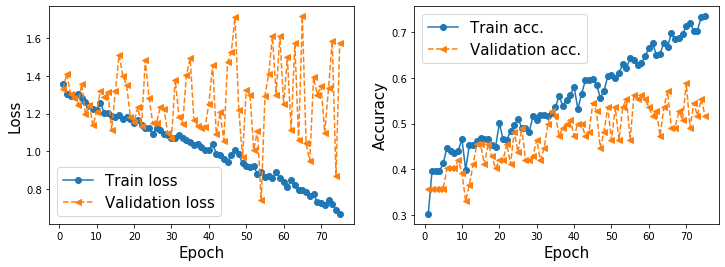

In [25]:
plot_loss_and_acc(history1)

In [17]:
history2 = model1.fit_generator(train_gen,
                                validation_data=valid_gen,
                                epochs=100,
                                steps_per_epoch=steps_per_epoch,
                                validation_steps=validation_steps)

Epoch 1/100
27/27 [==============================] - 1s 26ms/step - loss: 0.9410 - accuracy: 0.6025 - val_loss: 1.0213 - val_accuracy: 0.5268
Epoch 2/100
27/27 [==============================] - 1s 32ms/step - loss: 0.8883 - accuracy: 0.6228 - val_loss: 1.2498 - val_accuracy: 0.5714
Epoch 3/100
27/27 [==============================] - 1s 33ms/step - loss: 0.8643 - accuracy: 0.6385 - val_loss: 0.9569 - val_accuracy: 0.4911
Epoch 4/100
27/27 [==============================] - 1s 30ms/step - loss: 0.8590 - accuracy: 0.6541 - val_loss: 1.2624 - val_accuracy: 0.5268
Epoch 5/100
27/27 [==============================] - 1s 33ms/step - loss: 0.8754 - accuracy: 0.6322 - val_loss: 1.0739 - val_accuracy: 0.4821
Epoch 6/100
27/27 [==============================] - 1s 30ms/step - loss: 0.8448 - accuracy: 0.6635 - val_loss: 1.1407 - val_accuracy: 0.5268
Epoch 7/100
27/27 [==============================] - 1s 33ms/step - loss: 0.8922 - accuracy: 0.6197 - val_loss: 1.0676 - val_accuracy: 0.5000
Epoch 

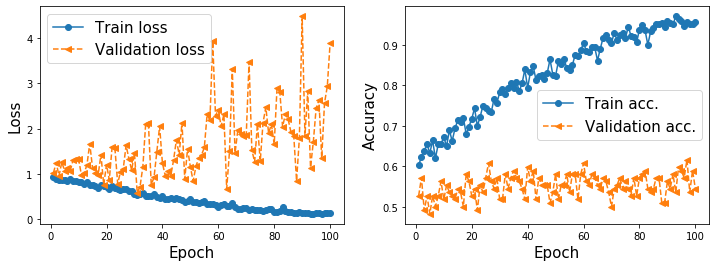

In [18]:
plot_loss_and_acc(history2)

In [19]:
history3 = model1.fit_generator(train_gen,
                                validation_data=valid_gen,
                                epochs=40,
                                steps_per_epoch=steps_per_epoch,
                                validation_steps=validation_steps)

Epoch 1/40
27/27 [==============================] - 1s 26ms/step - loss: 0.1612 - accuracy: 0.9499 - val_loss: 2.0693 - val_accuracy: 0.5893
Epoch 2/40
27/27 [==============================] - 1s 32ms/step - loss: 0.1473 - accuracy: 0.9515 - val_loss: 2.7352 - val_accuracy: 0.5268
Epoch 3/40
27/27 [==============================] - 1s 33ms/step - loss: 0.1115 - accuracy: 0.9656 - val_loss: 0.9973 - val_accuracy: 0.5625
Epoch 4/40
27/27 [==============================] - 1s 34ms/step - loss: 0.0893 - accuracy: 0.9656 - val_loss: 2.7305 - val_accuracy: 0.5804
Epoch 5/40
27/27 [==============================] - 1s 33ms/step - loss: 0.1019 - accuracy: 0.9624 - val_loss: 1.2796 - val_accuracy: 0.6071
Epoch 6/40
27/27 [==============================] - 1s 31ms/step - loss: 0.0639 - accuracy: 0.9844 - val_loss: 3.8972 - val_accuracy: 0.5536
Epoch 7/40
27/27 [==============================] - 1s 34ms/step - loss: 0.0725 - accuracy: 0.9718 - val_loss: 2.1899 - val_accuracy: 0.5714
Epoch 8/40
27

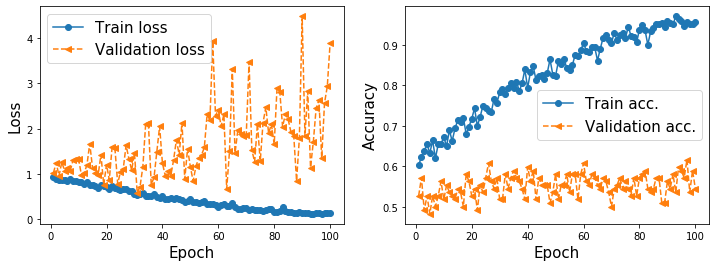

In [20]:
plot_loss_and_acc(history2)